# Custering of a Quantum Convolutional Processed Dataset

This notebook contains all the rutines to apply clustering methods to a quantum convolution processed dataset. The script will:

1. Load the dataset and print some statistics
2. Apply a clustering method
3. Showt the results

In [16]:
from data.datahandler import datahandler
from data.datareader import datareader
from layers.QConv2D import QConv2D
from utils import test_loader
from utils.plotter import *

from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from numpy import unique
from numpy import where
import numpy as np
import os

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load dataset

Instructions
1. the dataset should be placed in the working directory, specifically in the **datasets** folder.
2. the dataset should be already divided into classes, one-subfolder for earch classes. The folder/class name will be used to encode the label

```
QuantumCNN
│   README.md
│   requirements.txt    
│
└───circuits
└───...
└───datasets
    └───EuroSAT
        └───Highway
                highway1.jpg
                highway2.jpg                
        └─── ....
        └───Lake
                lake1.jpg
                lake2.jpg                

```

Given *the dataset_name*, that must be the same of the folder, the **datahandler** will take care of loading the paths of the images and collected them into a class dictionary. After a report of the dataset will be printed.

In [17]:
dataset_name = 'EuroSAT_processed_rx'
root = os.path.join('datasets', dataset_name)
dhandler = datahandler(root)
dhandler.print_report(name=dataset_name)


Dataset EuroSAT_processed_rx

Class 0 - Forest                    - #images: 3000
Class 1 - River                     - #images: 2500
Class 2 - Highway                   - #images: 2500
Class 3 - AnnualCrop                - #images: 3000
Class 4 - SeaLake                   - #images: 3000
Class 5 - HerbaceousVegetation      - #images: 3000
Class 6 - Industrial                - #images: 2500
Class 7 - Residential               - #images: 3000
Class 8 - PermanentCrop             - #images: 2500
Class 9 - Pasture                   - #images: 2000


The **unpack** function trasforms the dataset from a dictionary to an array. It assigns also the label to each image and returns a dictionary mapping the labels with the class name

In [18]:
labels_mapper, x, y = dhandler.unpack(dhandler.paths)

print('Labels')
for key in labels_mapper: print('{:<30s}{}'.format(key,labels_mapper[key]))

print('\nDataset Size')
print('{:<30s}{}'.format('Images', len(x)))

print('\nTraining Dataset samples')
print('{:<30s}{}'.format('X Train', x[0]))
print('{:<30s}{}'.format('X Train', y[0]))

Labels
Forest                        [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
River                         [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Highway                       [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
AnnualCrop                    [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
SeaLake                       [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
HerbaceousVegetation          [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Industrial                    [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Residential                   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
PermanentCrop                 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Pasture                       [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Dataset Size
Images                        27000

Training Dataset samples
X Train                       datasets/EuroSAT_processed_rx/Forest/Forest_576.npy
X Train                       [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Test the keras-like data loader. In this specific case the *datareader.generatorv2* is tested. It contains all the rutines to load images batch by batch (1 in this case).

Reading Image: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 27000/27000 [00:11<00:00, 2423.44it/s]


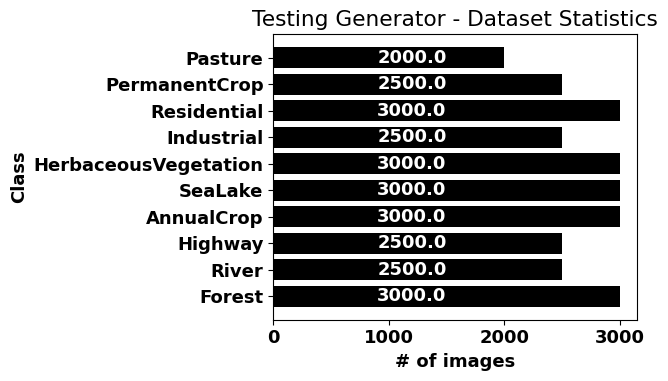

In [19]:
classes = dhandler.paths.keys()
loader  = datareader.generatorv2((x, y), (64,64,3))
test_loader.dlv2([x,y], loader, classes)

In [67]:
loader  = iter(datareader.generatorv2((x, y), (6,6,9)))
X = []
Y = []

for _ in tqdm(range(len(x))):
    
    it = next(loader)
    
    X.append(it[0].flatten())
    Y.append(np.argmax(it[1]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 27000/27000 [00:12<00:00, 2081.39it/s]


In [68]:
X = np.array(X)
Y = np.array(Y)

In [69]:
model = Birch(n_clusters=10)

In [70]:
model.fit(X)

Birch(n_clusters=10)

In [71]:
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)

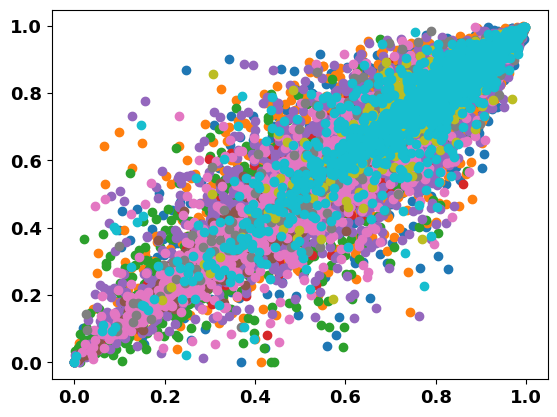

In [72]:
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

(array([3000., 2500., 2500., 3000., 3000., 3000., 2500., 3000., 2500.,
        2000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

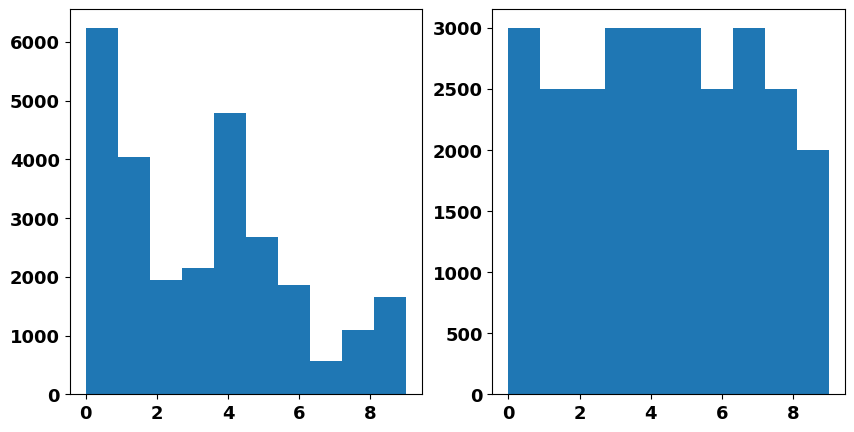

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
axes[0].hist(yhat)
axes[1].hist(Y)


In [65]:
for i in range(len(x)):
    print(yhat[i], Y[i])

5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0.